<a href="https://colab.research.google.com/github/marnitam/python/blob/main/tiff2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib.request import urlopen
import json
response = urlopen('https://tiff.net/festivalfilmlist')
film_data = json.loads(response.read())

In [3]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
film_df = pd.DataFrame.from_dict(film_data['items'])
print(film_df.columns)

Index(['id', 'title', 'slug', 'url', 'img', 'posterUrl', 'description',
       'isCanadian', 'isDigital', 'digitalEndDate', 'directors', 'interests',
       'regionOfInterests', 'genre', 'webProgrammes', 'scheduleItems',
       'countries', 'languages', 'multi', 'cinemathequeItem', 'd', 'creators'],
      dtype='object')


In [50]:
film_df["link"] = film_df.apply(lambda row: "https://tiff.net"+row["url"], axis = 1)
filmonly_df = film_df[film_df.webProgrammes.apply(lambda x: "Industry Conference" not in x)]
print("Total number of films:",len(filmonly_df))
print(filmonly_df.shape)

Total number of films: 125
(125, 23)


Total number of countries: 37


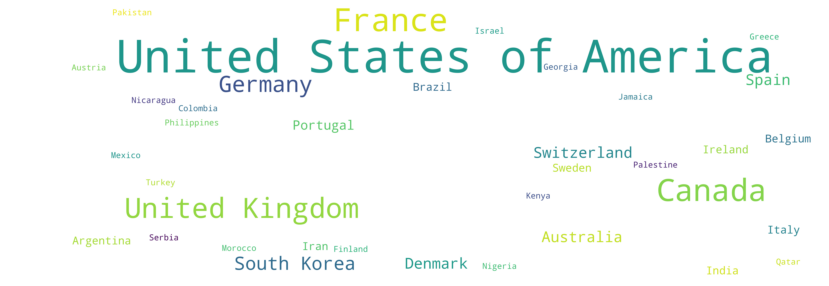

In [40]:
countries = []
list(map(lambda x: countries.extend(x) if x=="" else countries.extend(x.split(",")),filmonly_df["countries"]))
countries = sorted(set(countries))
print("Total number of countries:",len(countries))
c = {}
for country in countries:
 # print(country, filmonly_df['countries'].str.contains(country, na=False).sum())
  c[country] = filmonly_df['countries'].str.contains(country, na=False).sum()

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",min_font_size=10,width=1200,height=400,scale=8,prefer_horizontal=1.5)
wordcloud.generate_from_frequencies(frequencies=c)
plt.figure(figsize=(15,5)) #figsize=(15,10), dpi=50
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Total number of languages: 37


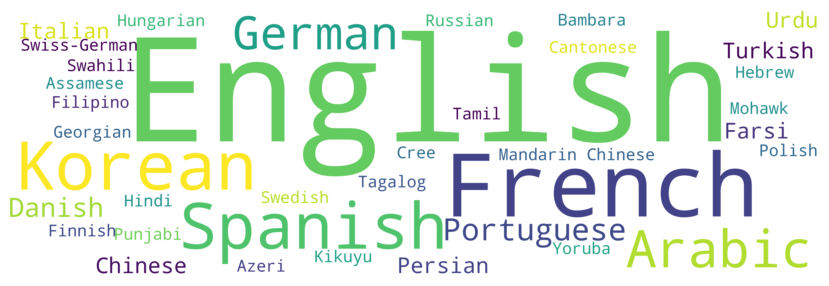

In [43]:
languages = []
list(filter(lambda x: x if x.strip()=="" else languages.extend(x.split(",")),filmonly_df["languages"]))
languages = sorted(set([c.strip() for c in languages if c != ""]))
print("Total number of languages:", len(languages))
l={}
for lang in languages:
  #print(lang, filmonly_df['languages'].str.contains(lang, na=False).sum())
  l[lang] = filmonly_df['languages'].str.contains(lang, na=False).sum()

wordcloud = WordCloud(background_color="white",min_font_size=8,width=1200,height=400,scale=8,prefer_horizontal=1.5)
wordcloud.generate_from_frequencies(frequencies=l)
plt.figure(figsize=(15,5)) #figsize=(15,10), dpi=50
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [187]:
directors = []
list(map(lambda x: directors.extend(x),filmonly_df["directors"]))
directors = sorted(set(directors))
#print(*directors,sep="\n")
print("Total number of directors:", len(directors))
#print(filmonly_df['directors'].explode().value_counts().sort_index())
#for d in directors:
#  print(d, filmonly_df['directors'].to_string().contains(d, na=False).sum())

Total number of directors: 129
Adirley Queirós            1
Aitch Alberto              1
Albert Serra               1
Ali Abbasi                 1
Alice Diop                 1
Alice Winocour             1
Alicia K. Harris           1
Allen Hughes               1
Amy Redford                1
Angela Wanjiku Wamai       1
Anthony Shim               1
Antoine Bourges            1
Ashley McKenzie            1
Baran bo Odar              1
Basil Khalil               1
Benjamin Millepied         1
Bess Wohl                  1
Biyi Bandele               1
Brett Morgen               1
Carmen Jaquier             1
Carolina Markowicz         1
Catherine Hardwicke        1
Cesc Gay                   1
Chandler Levack            1
Christian Carion           1
Clea DuVall                1
Clement Virgo              1
Cyril Schäublin            1
Cédric Ido                 1
Daniel Goldhaber           1
Darren Aronofsky           1
Davit Pirtskhalava         1
Davy Chou                  1
Diego Lerman

In [51]:
display(filmonly_df[["id","title","link","isCanadian","directors","genre","webProgrammes","countries","languages"]])

,id,title,link,isCanadian,directors,genre,webProgrammes,countries,languages
0,T000002708,1899,https://tiff.net/events/1899,False,[Baran bo Odar],[],[Primetime],"Germany,United States of America","German, French, Cantonese, Danish, Polish, Spa..."
1,T000000490,A Gaza Weekend,https://tiff.net/events/a-gaza-weekend,False,[Basil Khalil],"[Drama, Comedy]",[Discovery],"Palestine,United Kingdom","English, Arabic, Hebrew"
2,T000002689,A Jazzman's Blues,https://tiff.net/events/a-jazzmans-blues,False,[Tyler Perry],[],[Gala Presentations],United States of America,English
3,T000003223,A Long Break,https://tiff.net/events/a-long-break,False,[Davit Pirtskhalava],[],[Discovery],Georgia,Georgian
4,T000002871,A Man of Reason,https://tiff.net/events/a-man-of-reason,False,[Jung Woo-sung],[],[Special Presentations],South Korea,Korean
5,T000002037,"Alice, Darling",https://tiff.net/events/alice-darling,True,[Mary Nighy],"[Thriller, Drama]",[Gala Presentations],"Canada,United States of America",English
6,T000002691,All Quiet on the Western Front,https://tiff.net/events/all-quiet-on-the-weste...,False,[Edward Berger],[],[Special Presentations],"United States of America,Germany",German
7,T000002728,Allelujah,https://tiff.net/events/allelujah,False,[Richard Eyre],[],[Special Presentations],United Kingdom,English
8,T000003161,Aristotle and Dante Discover the Secrets of th...,https://tiff.net/events/aristotle-and-dante-di...,False,[Aitch Alberto],[Drama],[Discovery],United States of America,English
9,T000003089,Baby Ruby,https://tiff.net/events/baby-ruby,False,[Bess Wohl],[],[Discovery],United States of America,English


In [50]:
!pip install dash
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from dash import dash_table

# Build App
app = JupyterDash(__name__)
app.layout = dash_table.DataTable(filmonly_df.to_dict('records'), [{"name": i, "id": i} for i in filmonly_df.columns])

# Run app and display result inline in the notebook
app.run_server(mode='inline')

TypeError: ignored